# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

- En este apartado se leen los distintos dataset y se valida la información general de los mismos.
- De ser necesario se utilizará un parámetro con el método `'pd.read_csv()'` para la correcta lectura de los datasets.
- Se utilizarán los siguientes métodos para obtener información de los dataset:
    - `'sample()'`: para obetner una muestra aleatoria de los datos.
    - `'info()'`: para obtener una descripción general del dataset.
    - `'describe()'`: donde sea útil para revisar valores de tipo numérico.

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [29]:
# Se leen los archivos de datos para cada uno de los datasets. Se pasa como parámetro el separador ';' para una
# correcta lectura y visualización de los archivos '.csv'.

instacart_orders = pd.read_csv('instacart_orders.csv',sep=';',encoding='utf-8')

products = pd.read_csv(
    'products.csv',
    sep=';',
    encoding='utf-8',
    )

orders_products = pd.read_csv(
    'order_products.csv',
    sep=';',
    encoding='utf-8'
    )

aisles = pd.read_csv(
    'aisles.csv',
    sep=';',
    encoding='utf-8'
    )

departments = pd.read_csv(
    'departments.csv',
    sep=';',
    encoding='utf-8'
    )

In [30]:
print("-- Una muestra de los datos del dataset: \n")
print(instacart_orders.sample(n= 5, random_state = 1))
print()
print("-- Información general del dataset: \n")
instacart_orders.info(show_counts=True)
print()
print("-- Información general sobre los datos de tipo numérico: \n")
instacart_orders.describe()

-- Una muestra de los datos del dataset: 

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
223727   1808583    75321             9          6                  9   
334649   2088177   168309             6          6                 17   
74611    2674184   179460            27          2                 11   
117602   3227775   197374             5          0                 10   
102811   1669091   152080            31          1                 16   

        days_since_prior_order  
223727                    13.0  
334649                    13.0  
74611                      7.0  
117602                     8.0  
102811                     5.0  

-- Información general del dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [31]:
print("-- Una muestra de los datos del dataset: \n")
print(products.sample(n= 5, random_state = 1))
print()
print("-- Información general del dataset: \n")
products.info()

-- Una muestra de los datos del dataset: 

       product_id                      product_name  aisle_id  department_id
20471       20472                               NaN       100             21
34022       34023                Whole Grain Quinoa        63              9
33304       33305  Brooklyn Blackout Cake Ice Cream        37              1
11809       11810                               NaN       100             21
25065       25066      Dark Hazelnut Praline Square        45             19

-- Información general del dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [32]:
print("-- Una muestra de los datos del dataset: \n")
print(orders_products.sample(n= 5, random_state = 1))
print()
print("-- Información general del dataset: \n")
orders_products.info(show_counts=True)
print()
print("-- Información general sobre los datos de tipo numérico: \n")
orders_products.describe()


-- Una muestra de los datos del dataset: 

         order_id  product_id  add_to_cart_order  reordered
3588438   3081212       11005                3.0          1
1911837   2895083       46303                1.0          0
4214450   1427494       47209                2.0          1
3689340   3282397       16797                1.0          1
887929    2303585       18027                7.0          1

-- Información general del dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

-- Información general sobre los datos de tipo numérico: 



,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


In [33]:
print("-- Una muestra de los datos del dataset: \n")
print(aisles.sample(n= 5, random_state = 1))
print()
print("-- Información general del dataset: \n")
aisles.info()

-- Una muestra de los datos del dataset: 

    aisle_id          aisle
42        43     buns rolls
36        37  ice cream ice
93        94            tea
5          6          other
65        66    asian foods

-- Información general del dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [34]:
print("-- Una muestra de los datos del dataset: \n")
print(departments.sample(n= 5, random_state = 1))
print()
print("-- Información general del dataset: \n")
departments.info()

-- Una muestra de los datos del dataset: 

    department_id     department
15             16     dairy eggs
10             11  personal care
3               4        produce
18             19         snacks
17             18         babies

-- Información general del dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusiones

### Dataset instacart_orders.csv:

- En términos generales el dataset está completo.
- Los nombres de las columnas son consistentes, todos los caracteres en minúscula y sin espacios entre palabras.
- Se observa valores ausentes en la columna: `'days_since_prior_order'`. Son `'28819'` datos ausentes. Dada esta cantidad no se ve afectada la calidad del dataset, pero hay que procesarlos.
- El tipo de datos de la columna `'days_since_prior_order'` está como tipo `'float'`, debe ser de tipo `'entero'`.
- La columna `'order_dow'` que representa el día de la semana, se puede convertir a una columna de tipo categórico, para mejorar la lectura de los datos.
- Para la descripción de este dataset se utilizó, entre otros, el método `'describe()'`, para obtener una información detallada de los valores numéricos. Esto permitió validar, por ejemplo, que los datos de la columna `'order_dow'` toman valores enre `'0 y 6'`. Ó, que la columna `'order_hour_of_day'` tiene valores entre `'0 y 23'`

### Dataset products.csv:

- En genreal el datase está completo.
- Se observan algunos valores ausentes en la columna `'product_name'`. Alrededor de `'1258'` valores ausentes para esta columna. Es posible tratar de inferir el valor de estos campos con la información de los otros dataset. De no ser posible, y dada la cantidad de valores ausentes, se pueden completar con otro nombre.

### Dataset order_products.csv

- En general el dataset está completo.
- Se observa valores ausentes en la columna `'add_to_cart_order'`. Alrededor de `'836'` valores ausentes. Teniendo en cuenta el tamaño del dataset, esta cantidad de datos ausentes no afecta la calidad del dataset.
- El tipo de datos de la columna `'add_to_cart_order'` es `'float'`, el tipo de datos debe ser `'entero'`.
- Para una mejor lectura del dataset la columna `'reordered'` se puede cambiar a una columna de tipo categórico.

### Dataset aisles.csv

- El dataset está completo y no se observan datos ausentes.
- Los tipos de datos para cada columna son consistentes

### Dataset departments.csv

- El dataset está completo y no se observan datos ausentes.
- Los tipos de datos para cada columna son consistentes

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

### Verifica y corrige los tipos de datos

- Del paso anterior se pudo identificar que existen algunos tipos de datos inconsistentes, y que existen otros datos que se pueden representar mejor de forma catégorica. En resumen se encontró los siguiente:
    - `'instacart_orders.csv'`: 
        - El tipo de datos de la columna `'days_since_prior_order'` está como tipo `'float'`, debe ser de tipo `'entero'`.
        - La columna `'order_dow'` que representa el día de la semana, se puede convertir a una columna de tipo categórico, donde se muestre el nombre del día de la semana y no un número.    
    - `'order_products.csv'`:
        - El tipo de datos de la columna `'add_to_cart_order'` es `'float'`, el tipo de datos debe ser `'entero'`.
        - Para una mejor lectura del dataset la columna `'reordered'` se puede cambiar a una columna de tipo categórico. Donde se pueda leer sí o no.

### Identifica y completa los valores ausentes.

- En la evaluacion preliminar se econtraron algunos valores ausentes en algunos datasets.
- Se validará cada dataset para confirmar los valores ausentes y se procederá a completar, donde sea posible, los valores ausentes.
- Se identificaron valores ausentes en los siguientes datasets:
    - `'instacart_orders.csv'`:    
        - Se observa valores ausentes en la columna: `'days_since_prior_order'`. Son `'28819'` datos ausentes. Estos valores ausentes se podrían reemplazar por la `'mediana'` de los valores de esta columna. Hay que validar primero el por qué se puede estar presentando estos valores ausentes, y determianr si es posible completarlos con otro valor.
    - `'products.csv'`:    
        - En este dataset hay valores ausentes en la columna: `'product_name'`. Son `'1258'` valores ausentes en esta columna. Estos datos se peuden manejar de dos formas:
            - Tratar de inferir el nombre de los productos faltantes con la información de otras tablas, como por ejemplo `'departments'` y `'departments'`.
            - En caso de que lo anterior no sea posible, porque no se encuentra información al respecto, se pueden completar como `'unknown'`, ya que esto no afectará la integridad del dataset, ni los futuros análisis.        
    - `'order_products.csv'`:
        - Se observa valores ausentes en la columna `'add_to_cart_order'`. Alrededor de `'836'` valores ausentes. Teniendo en cuenta el tamaño del dataset, esta cantidad de datos ausentes no afecta la calidad del dataset. Estos datos se pueden completar con el resultado de la `'mediana'` de los valores de la columna en cuestión. O con algún otro valor después de mirar el detalle de los datos ausentes.        
    - `'aisles.csv'` y `'departments.csv'`: Para estos datasets no se encontaron valores ausentes.

### Identifica y elimina los valores duplicados.

- Validar en cada dataset los valores duplicados.
- Para cada dataset se identificará un campo o columna para buscar inequivocamente por valores duplicados. Por ejemplo:
    - `'instacart_orders.csv'`: En este dataset se puede buscar por valores únicos en la columna `'order_id'`, con la ayuda de los métodos `'duplicated() y sum()'` y `'value_counts()'`.
    - `'products.csv'`: En este dataset se puede hacer uso de los métodos `'duplicated() y sum()'`.
    - `'order_products.csv'`: En este dataset se puede buscar por valores únicos en la columna `'order_id'`, con la ayuda de los métodos `'duplicated() y sum()'` y `'value_counts()'`.      
    - `'aisles.csv'` y `'departments.csv'`: Para estos datasets se puede hacer uso de los métodos `'duplicated() y sum()'`.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [35]:
# Se identifica la cantidad de duplicados en el dataset y se muestra en pantalla.
duplicated_orders = instacart_orders['order_id'].duplicated().sum()
print(f"-- Total de filas duplicadas: {duplicated_orders}")
print()

# Se filtra y se crea un nuevo dataset 'duplicated_orders' de las filas duplicadas y se muestra en pantalla
duplicated_orders = instacart_orders[instacart_orders['order_id'].duplicated()]
print(f"-- Las filas duplicadas son:\n {duplicated_orders}")

-- Total de filas duplicadas: 15

-- Las filas duplicadas son:
         order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3          

1. **El dataset tiene 15 filas duplicadas.**
2. **Tienen en común que los pedidos se realizaron el día miércoles a las 2:00 am.**

In [36]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

# Se filtra y se crea un nuevos dataset con los pedidos realizados el día miércoles a las 2:00 am.
# Luego se muestra en pantalla.
orders_wed_two_am = instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]
print(f"-- Pedidos realizados el miércoles a las 2:00 a.m: \n\n {orders_wed_two_am}")
print()
# Se cuenta la cantidad de valores únicos para los 'user_id'
users_uniques = orders_wed_two_am['user_id'].value_counts()
print(f"-- Cantidad de valores únicos para la columna user_id: \n\n {users_uniques.head(20)}")
print()

# Se valida si para un user_id específico existe un pedido duplicado. Se valida con user_id que aparezca
# más de una vez en user_uniques
ids = [106752, 86751, 188546, 50898, 63189]
col = ['user_id', 'order_id', 'order_dow', 'order_hour_of_day', 'order_number']
is_user_duplicated = orders_wed_two_am[orders_wed_two_am['user_id'].isin(ids)][col].sort_values(by='user_id')
print(f"-- Existen pedidos duplicados?: \n {is_user_duplicated}")


-- Pedidos realizados el miércoles a las 2:00 a.m: 

         order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
515

1. **Se encuentra que existen 121 registros para pedidos realizados el día miércoles a las 2:00 am.**
2. **Si se valida la cantidad de valores únicos para la columna `'user_id'` en el dataset `'orders_wed_two_am'` se encuentra que existen "user_id" que aparecen mas de una vez, y con el mismo `'order_number'`.**
3. **Lo anterior da a entender que existen pedidos duplicados, ya que un mismo usuario no puede realizar dos pedidos con el mismo `'order_number'`.**
4. **Para hacer una doble comprobación se filtra el dataset `'orders_wed_two_am'` con algunos de los `'user_id'` que aparecen mas de una vez y se encuentra que efectivamente está duplicado el pedido.**
5. **Con base a lo anterior se decide eliminar los pedidos duplicados**

In [37]:
# Elimina los pedidos duplicados
# Se resetean los indices del dataset
instacart_orders.drop_duplicates(inplace=True)
instacart_orders.reset_index(drop=True)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [38]:
# Se valida la cantidad de duplicados

duplicated_orders = instacart_orders['order_id'].duplicated().sum()
print(f"-- Total de filas duplicadas: {duplicated_orders}")
print()

-- Total de filas duplicadas: 0



In [39]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders_uniques = instacart_orders['order_id'].value_counts()
print(f"-- Cantidad de valores únicos para la columna order_id: \n\n {orders_uniques}")
print()


-- Cantidad de valores únicos para la columna order_id: 

 order_id
1515936    1
2365274    1
336622     1
684027     1
1115132    1
          ..
2578130    1
1034057    1
597364     1
2142471    1
2071924    1
Name: count, Length: 478952, dtype: int64



- Lo primero fue validar si había duplicados. Encontrando 15 registos duplicados.
- Luego se validó si estos registros duplicados, en realidad lo eran. En este caso se encontró que algunos pedidos se realizaron miércoles a las 2:00 am. Luego se validó si había mas de un pedido para un mismo usario, y siendo posible que un usuario pueda realizar mas de un pedido en el transcurso de una hora, se comprueba el número de la orden. Si el número de la orden es el mismo, esto nos ayuda a confirmar que se trata de un pedido duplicado.
- Con la certeza de que se trataban de pedidos duplicados se procedió a eliminar dichos registros y a resetear el índice de la tabla.
- Es posible que estos datos duplicados se hayan presentado por un error en la plataforma.

### `products` data frame

In [40]:
# Verifica si hay filas totalmente duplicadas
duplicated_products = products.duplicated().sum()
print(f"-- Cantidad de filas duplicadas: \n{duplicated_products}")
print()

# Cantidad de id de productos duplicados
duplicated_products_id = products['product_id'].value_counts()
print(f"-- Cantidad de products ID duplicados: \n{duplicated_products_id.head()}")


-- Cantidad de filas duplicadas: 
0

-- Cantidad de products ID duplicados: 
product_id
1        1
33146    1
33124    1
33125    1
33126    1
Name: count, dtype: int64


In [41]:
#Revisa únicamente si hay ID de departamentos duplicados
# Se cuenta el número de registos para el objeto Series
duplicated_departments_id = products['department_id'].value_counts(dropna=False)
print(f"-- Cantidad de ID departments duplicados: \n{duplicated_departments_id}")
print()
print(f"-- Información general del Series duplicated_departments_id: \n {duplicated_departments_id.shape}")
print()

# Comprobar la cantidad de ID deparments, para validar que correspenda con la cantidad de registros del dataset.
duplicated_departments_id = products['department_id'].nunique()
print(f"-- Cantidad de ID departments únicos: \n{duplicated_departments_id}")

-- Cantidad de ID departments duplicados: 
department_id
11    6564
19    6264
13    5372
7     4366
1     4008
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1117
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: count, dtype: int64

-- Información general del Series duplicated_departments_id: 
 (21,)

-- Cantidad de ID departments únicos: 
21


In [42]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas
# para compararlos mejor)

# Se valida la cantidad de nombres duplicados de productos sin convertir a mayúsculas los nombres
duplicated_name_products = products['product_name'].value_counts(dropna=False)
print(f"-- Valores únicos para la columna 'product_name: \n{duplicated_name_products}")
print()

# Se convierte a mayúsuclas los nombres de los productos, y se crea uan nueva columna llamada: 'product_name_upper'
products['product_name_upper'] = products['product_name'].str.upper()

# Se cuenta el número de valores únicos en la columna de nombres de productos, ya convertido en mayúsculas
duplicated_name_products_upper = products['product_name_upper'].value_counts(dropna=False)
print(f"-- Valores únicos para la columna 'product_name_upper': \n{duplicated_name_products_upper}")

-- Valores únicos para la columna 'product_name: 
product_name
NaN                                      1258
Chocolate Sandwich Cookies                  1
Krinkle Cut Carolina BBQ Potato Chips       1
Fresh Ground Turkey- 85% Lean/15% Fat       1
Organic Unsweetened Ketchup                 1
                                         ... 
Organic Fresh Carrot Chips                  1
Unbleached Jumbo Baking Cups                1
Super Glue Gel Control                      1
3 Cheese Ravioli                            1
BURRITO- STEAK & CHEESE                     1
Name: count, Length: 48437, dtype: int64

-- Valores únicos para la columna 'product_name_upper': 
product_name_upper
NaN                                                                     1258
GREEN TEA WITH GINSENG AND HONEY                                           3
CARROT AND CELERY STICKS                                                   2
APRICOT ENERGY BAR                                                         2
PROAC

In [43]:
# Revisa si hay nombres duplicados de productos no faltantes
duplicated_names = products['product_name_upper'].duplicated().sum()
print(f"-- Cantidad de filas duplicadas por nombre de productos, incluye nombre de productos faltantes: \n{duplicated_names}")
print()

# Se filtra el dataset por los nombres de productos duplicados excluyendo las filas cuyo nombre de producto
# no existe
duplicated_names = products[(products['product_name_upper'].duplicated()) & ~(products['product_name_upper'].isna())]
print(f"-- Listado de nombre de productos duplicados y cuyo nombre de producto existe: \n{duplicated_names.head(5)}")
print()
print("-- Ejemplos de productos con nombres duplicados: \n")
print(products[products['product_name_upper'] == 'BIOTIN 1000 MCG'])
print()
print(products[products['product_name_upper'] == 'DRINKING WATER'])
print()
print(products[products['product_name_upper'] == 'GREEN TEA WITH GINSENG AND HONEY'])
print()

# Se eliminan las filas productos cuyos nombres de productos están duplicados
products = products[~((products['product_name_upper'].duplicated()) & ~(products['product_name_upper'].isna()))]
print()

print("-- Se valida si se eliminaron los productos duplicados: \n")
print(products[products['product_name_upper'] == 'BIOTIN 1000 MCG'])
print()
print(products[products['product_name_upper'] == 'DRINKING WATER'])
print()
print(products[products['product_name_upper'] == 'GREEN TEA WITH GINSENG AND HONEY'])
print()

products.reset_index(drop=True)
print("-- Información general del dataset: \n")
products.info()

-- Cantidad de filas duplicadas por nombre de productos, incluye nombre de productos faltantes: 
1361

-- Listado de nombre de productos duplicados y cuyo nombre de producto existe: 
      product_id                      product_name  aisle_id  department_id  \
2058        2059                   Biotin 1000 Mcg        47             11   
5455        5456  Green Tea With Ginseng and Honey        96             20   
5558        5559            Cream Of Mushroom Soup        69             15   
7558        7559         Cinnamon Rolls with Icing       105             13   
9037        9038            American Cheese slices        21             16   

                    product_name_upper  
2058                   BIOTIN 1000 MCG  
5455  GREEN TEA WITH GINSENG AND HONEY  
5558            CREAM OF MUSHROOM SOUP  
7558         CINNAMON ROLLS WITH ICING  
9037            AMERICAN CHEESE SLICES  

-- Ejemplos de productos con nombres duplicados: 

      product_id     product_name  aisle_id 

1. Se validó si había filas completamente duplicadas y no se encontró ningún caso. También se validó si existía ID de productos duplicados, tampoco se encontró ninguno.
2. Se validó la existencia de ID de departamentos duplicados y tampoco se encontró. Par validar este hallazgo se cruzó la información de la tabla `'departments'` con el resultado de la cuenta de valores únicos de la columna de `'deparments_ID'` de la tabla 'products', y estos valores coinciden.
3. Se validó la existencia de nombres de productos duplicados, para ello se pasó los nombres de productos a letras mayúsculas para compararlas, y se encuentran 104 nombres de productos duplicados, excluyendo los registros en donde el campo de nombre de producto está vacío.
4. Se validó los registros duplicados y cuyo campo de nombre de producto está vacío. Luego se filtran estos datos vacíos y se obtiene un dataset con los nombres de productos duplicados y cuyo campo de nombre de prodcuto está completo. 
5. Luego se eliminan los registros duplicados filtrando del dataset original los campos que cuyo nombre de producto están duplicados y cuyo campo de nombrede producto no corresponde a un dato ausente. 
6. Se hacen algunas validaciones para confirmar que se hayan eliminado correctamente.

### `departments` data frame

In [44]:
# Revisa si hay filas totalmente duplicadas
duplicated_departments = departments.duplicated().sum()
print(f"-- Cantidad de filas duplicadas: \n{duplicated_departments}")

-- Cantidad de filas duplicadas: 
0


In [45]:
# Revisa únicamente si hay IDs duplicadas de productos
duplicated_departments_id = departments['department_id'].value_counts(dropna=False)
print(f"-- Cantidad de valores únicos para deparment_id: \n{duplicated_departments_id}")
print()

# Cantidad de departamentos por nombre
duplicated_departments_name = departments['department'].value_counts(dropna=False)
print(f"-- Cantidad de valores únicos para el nombre del departamento: \n{duplicated_departments_name}")


-- Cantidad de valores únicos para deparment_id: 
department_id
1     1
12    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
11    1
2     1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
21    1
Name: count, dtype: int64

-- Cantidad de valores únicos para el nombre del departamento: 
department
frozen             1
meat seafood       1
deli               1
snacks             1
babies             1
household          1
dairy eggs         1
canned goods       1
breakfast          1
pantry             1
personal care      1
other              1
bulk               1
dry goods pasta    1
pets               1
beverages          1
international      1
alcohol            1
produce            1
bakery             1
missing            1
Name: count, dtype: int64


1. Se validó si existen filas duplicdas en el dataset; y no se encontró ninguna.
2. Se validó también la existencias de valores duplicados para los campos `'deparment_id'` y `'department'` y no se encontraron valores duplicados.
3. Por lo anterior, no fue necesario realizar ninguna gestión para valores duplicados en este dataset.

### `aisles` data frame

In [46]:
# Revisa si hay filas totalmente duplicadas
duplicated_aisles = aisles.duplicated().sum()
print(f"-- Cantidad de filas duplicadas: \n{duplicated_aisles}")

-- Cantidad de filas duplicadas: 
0


In [47]:
# Revisa únicamente si hay IDs duplicadas de productos
duplicated_aisle_id = aisles['aisle_id'].value_counts(dropna=False)
print(f"-- Cantidad de valores únicos para aisle_id: \n{duplicated_aisle_id}")
print()

# Cantidad de pasillos por nombre
duplicated_aisle_name = aisles['aisle'].value_counts(dropna=False)
print(f"-- Cantidad de valores únicos para el nombre de pasillos: \n{duplicated_aisle_name}")

-- Cantidad de valores únicos para aisle_id: 
aisle_id
1      1
85     1
99     1
98     1
97     1
      ..
40     1
39     1
38     1
37     1
134    1
Name: count, Length: 134, dtype: int64

-- Cantidad de valores únicos para el nombre de pasillos: 
aisle
prepared soups salads         1
food storage                  1
canned fruit applesauce       1
juice nectars                 1
baking supplies decor         1
                             ..
dog food care                 1
seafood counter               1
frozen meals                  1
ice cream ice                 1
specialty wines champagnes    1
Name: count, Length: 134, dtype: int64


1. Se validó si existen filas duplicdas en el dataset y no se encontró ninguna.
2. Se validó también la existencias de valores duplicados para los campos `'aisle_id'` y `'aisle'` y no se encontraron valores duplicados.
3. Por lo anterior no fue necesario realizar ninguna gestión para valores duplicados en este dataset.

### `order_products` data frame

In [48]:
# Revisa si hay filas totalmente duplicadas
duplicated_order_prod = orders_products.duplicated().sum()
print(f"-- Cantidad de filas duplicadas: \n{duplicated_order_prod}")

-- Cantidad de filas duplicadas: 
0


In [49]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
# Validar duplicados para order id
duplicated_order_prod_ord_id = orders_products['order_id'].value_counts(dropna=False)
print(f"-- Cantidad de valores únicos para order_id: \n{duplicated_order_prod_ord_id}")
print()
# Cantidad de valores únicos para product_id
duplicated_order_prod_pro_id = orders_products['product_id'].value_counts()
print(f"-- Cantidad de valores únicos para product_id: \n{duplicated_order_prod_pro_id}")


-- Cantidad de valores únicos para order_id: 
order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
3076918      1
2499566      1
556604       1
171279       1
1461911      1
Name: count, Length: 450046, dtype: int64

-- Cantidad de valores únicos para product_id: 
product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
         ...  
47987        1
26408        1
24435        1
36946        1
40024        1
Name: count, Length: 45573, dtype: int64


1. Se validó si había filas complentamente duplicadas y no se econtró ninguna.
2. Se validó valores duplicados para las columnas `'order_id'` y `'product_id'` y se encontraron duplicados. Lo cual tiene sentido porque en un pedido se puede incluir varios productos.
3. Para las columnas `'add_to_cart_order'` y `'reordered'` no tiene sentido validar duplicados porque dada la naturaleza de estos datos, va a haber duplicados.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [50]:
# Encuentra los valores ausentes en la columna 'product_name'
absent_values_prod_name = products[products['product_name'].isna()]
print(f"-- Registros con valores ausentes en la columna 'product_name': \n{absent_values_prod_name.sample(10)}")
print()
print(f"-- Cantidad de registros con valores ausentes en la columna 'product_name': \n{products['product_name'].isna().sum()}")

-- Registros con valores ausentes en la columna 'product_name': 
       product_id product_name  aisle_id  department_id product_name_upper
3378         3379          NaN       100             21                NaN
30803       30804          NaN       100             21                NaN
10689       10690          NaN       100             21                NaN
49481       49482          NaN       100             21                NaN
40795       40796          NaN       100             21                NaN
27031       27032          NaN       100             21                NaN
15060       15061          NaN       100             21                NaN
47358       47359          NaN       100             21                NaN
36750       36751          NaN       100             21                NaN
34170       34171          NaN       100             21                NaN

-- Cantidad de registros con valores ausentes en la columna 'product_name': 
1258


1. Se valdia lo encontrado en la exploración inicial del dataset, la columna `'product_name'` tiene valores ausentes.
2. Validando algunos registros, cuyo campo `'product_name'` está vacío, coincide que los campos para el pasillo y departamento corresponden a los valores 100 y 21 respectivamente.

In [51]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(f"-- Cantidad de registros con valor 100 en la columna 'aisle_id': \n{absent_values_prod_name['aisle_id'].value_counts()}")

-- Cantidad de registros con valor 100 en la columna 'aisle_id': 
aisle_id
100    1258
Name: count, dtype: int64


1. Se cuenta la cantidad de veces que aparece el id 100 en la columna `'aisle_id'`.
2. El resultado coincide con la cantidad de registros ausentes en la columna `'product_name'`: 1258

In [52]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(f"-- Cantidad de registros con valor 21 en la columna 'department_id': \n{absent_values_prod_name['department_id'].value_counts()}")

-- Cantidad de registros con valor 21 en la columna 'department_id': 
department_id
21    1258
Name: count, dtype: int64


1. Se cuenta la cantidad de veces que aparece el id 21 en la columna `'department_id'`.
2. El resultado coincide con la cantidad de registros ausentes en la columna `'product_name'`: 1258
3. Por lo anterior hay que revisar que pasó con los datos del pasillo 100 y el departamento 21 en sus respectivas tablas.

In [53]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100 = aisles[aisles['aisle_id'] == 100]
print(f"-- Nombre del pasillo 100:\n{aisle_100}")
print()
department_21 = departments[departments['department_id'] == 21]
print(f"-- Nombre del departamento 21: \n{department_21}")

-- Nombre del pasillo 100:
    aisle_id    aisle
99       100  missing

-- Nombre del departamento 21: 
    department_id department
20             21    missing


1. De acuerdo a lo anterior no se cuenta con los nombres del pasillo 100, ni del departamento 21.
2. Al no contar con información acerca del nombre del producto es necesario completar los valores ausentes en la columna `'product_name'` del dataset `'products'` con el valor `'Unknown'`

In [54]:
# Completa los nombres de productos ausentes con 'Unknown'
# Se usa el método fillna() para completar los valores ausentes con el valor 'Unknown'
products['product_name'] = products['product_name'].fillna(value='Unknown')

# Se valida que se haya completado correctamente el reemplazo
print(f"-- Cantidad de registros con valores ausentes en la columna 'product_name': \n{products['product_name'].isna().sum()}")

-- Cantidad de registros con valores ausentes en la columna 'product_name': 
0


1. Se valida la existencia de valores ausentes en la columna `'product_name'`.
2. Se encuentra que estos valores ausentes están relacionados con el pasillo 100 del dataset `'aisles'` y con el departamento 21 del dataset `'departments'`.
3. Se valida en cada uno de los datasets la información correspondiente y se encuentra que no hay datos para dichos valores en sus respectivas tablas.
4. Teniendo en cuanta lo anterior se decide completar los datos ausentes de la columna `'product_name'` con el valor `'Unknown'`.
5. Finalmente se comprueba si la operación se hizo correctamente, quedando así completos los datos del dataset.

### `orders` data frame

In [55]:
# Encuentra los valores ausentes
# Validar valores ausentes en el dataframe con el método info()
print("-- Información general del dataset:")
instacart_orders.info(show_counts=True)
print()

# Listado de valores únicos en la columna days_since_prior_order
absent_values_orders_uniques = instacart_orders['days_since_prior_order'].value_counts(dropna=False)
print(f"-- Listado de valores ausentes: \n{absent_values_orders_uniques}")
print()

# Listado de registro de valores ausentes en la columna days_since_prior_order
absent_values_orders = instacart_orders[instacart_orders['days_since_prior_order'].isna()]
print(f"-- Lista de valores ausentes: \n{absent_values_orders.head()}")

-- Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB

-- Listado de valores ausentes: 
days_since_prior_order
30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
5.0     30096
NaN     28817
2.0     27138
8.0     25361
1.0     20179
9.0     16753
14.0    13992
10.0    13309
13.0    11737
11.0    11467
12.0    10658
0.0      9589
15.0     9416
16.0     6587
21.0     6448
17.0     5498
20.0     5302
18.0     49

In [56]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
# Listado de registros de valores ausentes en la columna 'days_since_prior_order' y que el 'order_number' 
# sea diferente de 1
absent_values_orders = instacart_orders[(instacart_orders['days_since_prior_order'].isna()) & (instacart_orders['order_number'] != 1)]
print(f"-- Listado de valores ausentes: \n{absent_values_orders}")

# Reemplazar los valores ausentes en la columna 'days_since_prior_order' por ceros
instacart_orders['days_since_prior_order'] = instacart_orders['days_since_prior_order'].fillna(0)

# Listado de valores únicos en la columna days_since_prior_order
absent_values_orders_uniques = instacart_orders['days_since_prior_order'].value_counts(dropna=False)
print(f"-- Listado de valores ausentes: \n{absent_values_orders_uniques}")
print()

# Conversión del tipo de datos de la columna 'days_since_prior_order' de 'float' a 'int'
instacart_orders['days_since_prior_order'] = instacart_orders['days_since_prior_order'].astype('int')
#
instacart_orders.info()
print()


-- Listado de valores ausentes: 
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
-- Listado de valores ausentes: 
days_since_prior_order
30.0    51337
7.0     44577
0.0     38406
6.0     33930
4.0     31006
3.0     30224
5.0     30096
2.0     27138
8.0     25361
1.0     20179
9.0     16753
14.0    13992
10.0    13309
13.0    11737
11.0    11467
12.0    10658
15.0     9416
16.0     6587
21.0     6448
17.0     5498
20.0     5302
18.0     4971
19.0     4939
22.0     4514
28.0     3745
23.0     3337
24.0     3015
27.0     2986
25.0     2711
29.0     2673
26.0     2640
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_num

1. Se validó la existencia de valores ausentes en la columna `'days_since_prior_order'`.
2. Se encontró que esos valores ausente correspondían a la primera orden de un cliente, validando que los valores de `'order_number'` fuesen igual a 1.
3. Al tratarse del primer pedido de un cliente se decidió completar los valores ausentes con el valor 0.
4. Se cambió el tipo de datos de la columna `'days_since_prior_order'` de tipo `'float'` a tipo `'int'`.
5. Finalmente se realizó la conversión de los valores numéricos de la columna `'order_dow'` a los nombres del día de la semana. Es más descriptivo utilizar el nombre del día que un número.

### `order_products` data frame

In [57]:
# Encuentra los valores ausentes
# Validar valores ausentes en el dataframe con el método 'info()'
print("-- Información general del dataset:")
orders_products.info(show_counts=True)
print()

# Listado de valores únicos en la columna 'days_since_prior_order'
absent_values_order_product = orders_products['add_to_cart_order'].value_counts(dropna=False)
print(f"-- Listado de valores ausentes: \n{absent_values_order_product}")
print()

# Listado de registro de valores ausentes en la columna 'days_since_prior_order'
absent_values_order_product = orders_products[orders_products['add_to_cart_order'].isna()]
print(f"-- Listado de registros valores ausentes: \n{absent_values_order_product.head()}")

-- Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

-- Listado de valores ausentes: 
add_to_cart_order
1.0     450046
2.0     428199
3.0     401907
4.0     372861
5.0     341807
         ...  
60.0       127
61.0       114
62.0        98
63.0        87
64.0        75
Name: count, Length: 65, dtype: int64

-- Listado de registros valores ausentes: 
       order_id  product_id  add_to_cart_order  reordered
737     2449164        5068                NaN          0
9926    1968313       43867                NaN          0
14394   2926893       11688

In [58]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(f"-- El valor máximo para la columna 'add_to_cart_order' es: {orders_products['add_to_cart_order'].max()}")
print()
print(f"-- El valor mínimo para la columna 'add_to_cart_order' es: {orders_products['add_to_cart_order'].min()}")

-- El valor máximo para la columna 'add_to_cart_order' es: 64.0

-- El valor mínimo para la columna 'add_to_cart_order' es: 1.0


1. Se valida la existencia de valores ausentes en la columna `'add_to_cart_order'`.
2. Se encuentran los valores máximo y mínimo para la columna. Y se valida que el rango de datos dicha columna está entre 1 y 64.

In [59]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
absent_values_id = orders_products[orders_products['add_to_cart_order'].isna()]['order_id']
print(absent_values_id)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [60]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
####
# Se filtra el dataset teniendo como filtro el ID de pedidos y se extraen los datos
# del ID del producto para cada pedido.
columns = ['order_id', 'product_id']
absent_values_list = orders_products[orders_products['order_id'].isin(absent_values_id)][columns]
print(f"-- Listado del ID de la orden y de los ID de productos para \nlos campos con valores ausentes en la columna 'add_to_cart_order': \n{absent_values_list.head()}")
print()

# Los datos en 'absent_values_list' se agrupan por 'order_id' y se cuenta el product ID para cada orden
absent_values_list_group = absent_values_list.groupby(by='order_id').count().sort_values(by='product_id')
print(f"-- ID de productos ordenados por el ID de cada orden: \n{absent_values_list_group}")
print(f"-- El valor mínimo de productos en una orden es: \n{absent_values_list_group.min()}")

-- Listado del ID de la orden y de los ID de productos para 
los campos con valores ausentes en la columna 'add_to_cart_order': 
      order_id  product_id
267    2094761       31469
737    2449164        5068
1742   2997021        4920
3463    871281       40063
3535    171934       36397

-- ID de productos ordenados por el ID de cada orden: 
          product_id
order_id            
9310              65
747668            65
1598369           65
1677118           65
2170451           65
...              ...
1959075           98
171934           104
2136777          108
3308010          115
61355            127

[70 rows x 1 columns]
-- El valor mínimo de productos en una orden es: 
product_id    65
dtype: int64


1. Se encontró que las órdenes de pedidos con valores ausentes en la columna `'add_to_cart_order'` tienen desde 65 pedidos en adelante, siendo 127 el máximo valor.

In [61]:
# Remplaza los valores ausentes en la columna 'add_to_cart_order' con 999 y convierte la columna al tipo entero.
####
# Remplazar datos ausentes en 'add_to_cart_order'. Comprobar el valor máximo y cantidad da datos ausentes
orders_products['add_to_cart_order'] = orders_products['add_to_cart_order'].fillna(999)
print(f"-- Cantidad de valores ausentes en 'add_to_cart_order': \n{orders_products['add_to_cart_order'].isna().sum()}")
print()
print(f"-- Valor máximo en 'add_to_cart_order': \n{orders_products['add_to_cart_order'].max()}")
print()
# Cambiar el tipo de datos de float a int para la columna 'add_to_cart_order' y validar el tipo de datos en el dataset
orders_products['add_to_cart_order'] = orders_products['add_to_cart_order'].astype('int')
orders_products.info()
print()
print(orders_products.describe())


-- Cantidad de valores ausentes en 'add_to_cart_order': 
0

-- Valor máximo en 'add_to_cart_order': 
999.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB

           order_id    product_id  add_to_cart_order     reordered
count  4.545007e+06  4.545007e+06       4.545007e+06  4.545007e+06
mean   1.711166e+06  2.558084e+04       8.533887e+00  5.905025e-01
std    9.850955e+05  1.409552e+04       1.518562e+01  4.917411e-01
min    4.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.608170e+05  1.353500e+04       3.000000e+00  0.000000e+00
50%    1.711530e+06  2.527200e+04       6.000000e+00  1.000000e+00
75%    2.561311e+06  3.793500e+04       1.100000e+01  1.000000e+00
max    3.421079e+06  4.

1. Se validó la exitencia de datos ausentes en la columna `'add_to_cart_order'`.
2. Se pudo determinar que todos los registros con datos ausentes en la columna `'add_to_cart_order'` coincidían con órdenes de pedidos que tenían mas de 64 productos.
3. Con esta información se decicidió completar los valores ausentes con el valor 999.
4. Se cambió el tipo de datos de la columna `'add_to_cart_order'` de `'float'` a `'int'`.

## Conclusiones

1. El preprocesamiento de datos es una tarea que exige atención al detalle y la necesidad de conocer bien los dataset.
2. Es importante evaluar bien los datos duplicados. No todas las veces los datos duplicados corresponden a datos de más, hay que ser cuidadosos para no eliminar información del dataset.
3. Los datos ausentes merecen especial atención. Hay que ser cuidadosos al momento de elegir cómo y con qué completar dichos datos.
4. Hay que tener en cuenta los tipos de datos de los dataset, es importante mantener la consistencia entre los datos y lo que representan.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [62]:
# Se imprimens los valores únicos de la columna 'order_hour_day' para validar su consistencia.
data_check_hour = instacart_orders['order_hour_of_day'].unique()
print(np.sort(data_check_hour))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [63]:
# Se imprimen los valores únicos que toma la columna 'order_dow' para validar que correspondan a un día de la semana.
data_check_dow = instacart_orders['order_dow'].unique()
print(np.sort(data_check_dow))

[0 1 2 3 4 5 6]


1. Los datos se encuentran dentro del rango de valores esperados.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

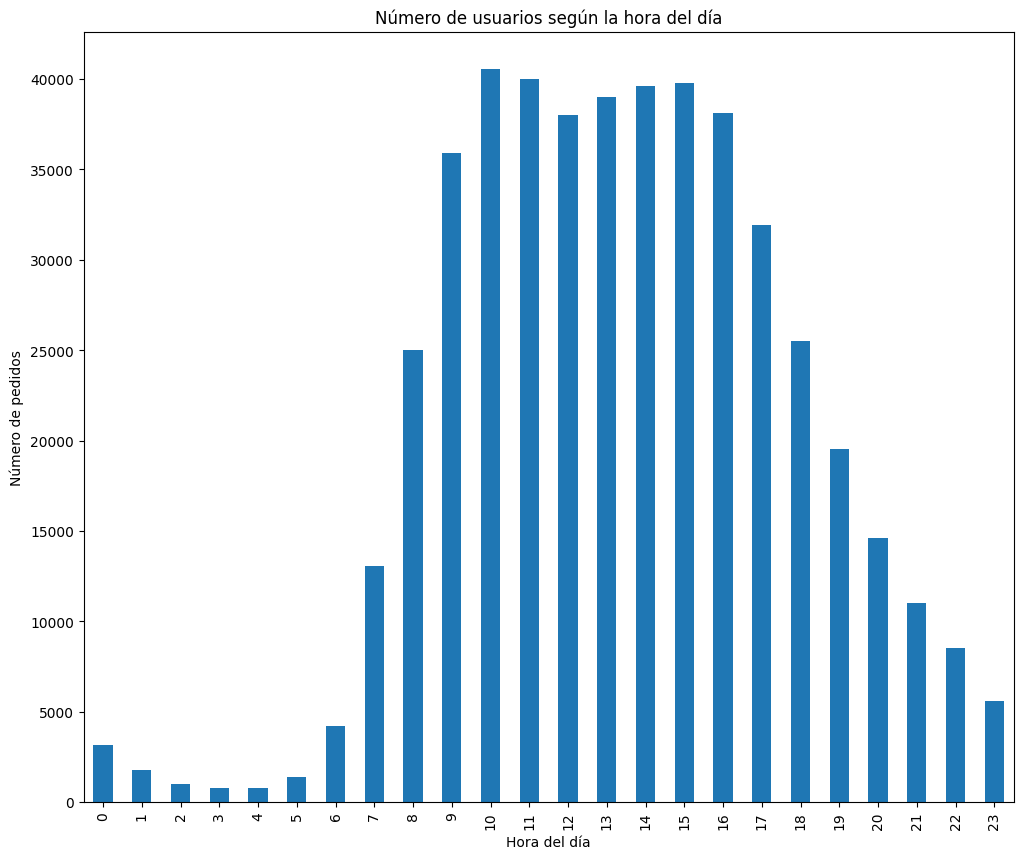

In [64]:
# Se agrupan los los pedidos por la hora del día en que fue realizado. Y se cuentan para obtener
# la cantidad de pedidos por cada hora del día.
instacart_order_hod = instacart_orders.groupby('order_hour_of_day')['user_id'].count()

# Se imprime en un gráfico de barras la cantidad de pedidos en cada hora del día.
instacart_order_hod.plot(
    x='order_hour_of_day',
    y='user_id',
    kind='bar',
    title='Número de usuarios según la hora del día',
    xlabel='Hora del día',
    ylabel="Número de pedidos",
    figsize=(12,10),
    
)
plt.show()

1. Las horas en que los usuarios hacen mas pedidos es entre las 10:00 hrs y las 16:00 hrs.
2. Entra las 23:00 hrs y las 6:00 hrs son las horas menos activas para los usuarios.

### [A3] ¿Qué día de la semana compran víveres las personas?

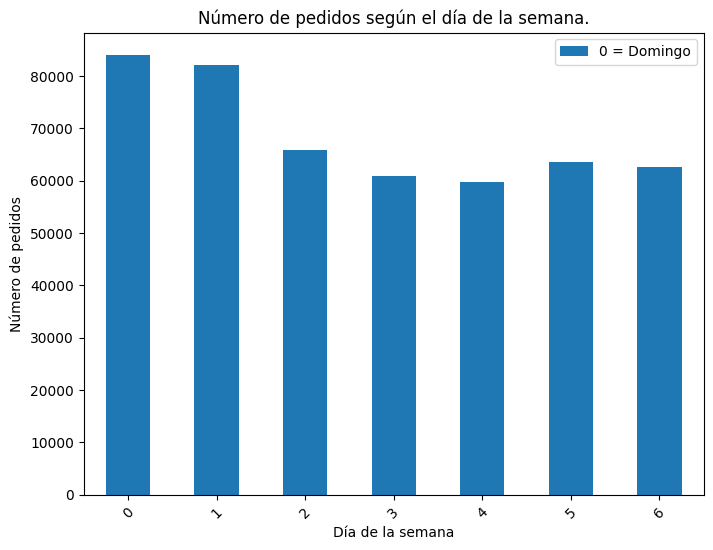

In [65]:
instacart_order_dow = instacart_orders.groupby('order_dow')['order_id'].count()
instacart_order_dow.plot(
    x='order_dow',
    y='order_id',
    kind='bar',
    title='Número de pedidos según el día de la semana.',
    xlabel='Día de la semana',
    ylabel="Número de pedidos",
    rot=45,
    figsize=(8, 6)
)
plt.legend(['0 = Domingo'])
plt.show()

1. Los lunes y los domingos son los días donde los usuarios hace más pedidos.
2. Los días restantes de la semana el comportamiento de los usuarios es similar.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

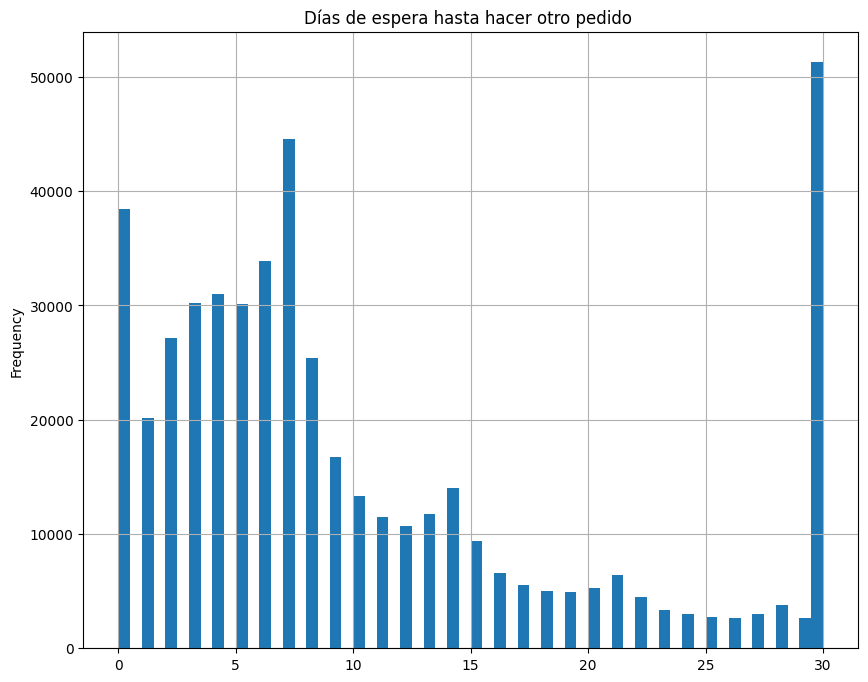

In [66]:
instacart_orders['days_since_prior_order'].plot(
    title='Días de espera hasta hacer otro pedido ',
    kind='hist',
    bins=60,
    grid=True,
    figsize=(10, 8)
    
)

plt.show()


1. Se realiza un histograma para ver la frecuencia de días que un cliente espera para hacer un segundo pedido.
2. Hay una gran cantidad de clientes que apenas realizó su primer pedido. Eso indica el valor 0.
3. Mientras que una cantidad considerable de cliente espera hasta 30 días para realizar un segundo pedido.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [67]:
# Se filtra el dataset 'instacart_orders' para obtener todos los pedidos que se realizan el día sábado
orders_sat = instacart_orders[instacart_orders['order_dow'] == 6]
print(orders_sat.head(5))

    order_id  user_id  order_number  order_dow  order_hour_of_day  \
0    1515936   183418            11          6                 13   
11    102585   191558            18          6                 16   
14   2843219    74699             4          6                 11   
20     50934   178510             9          6                  9   
26   1844247   122558             4          6                 18   

    days_since_prior_order  
0                       30  
11                       8  
14                      30  
20                       5  
26                      30  


In [68]:
# Se filtra el dataset 'instacart_orders' para obtener todos los pedidos que se realizan el día miércoles
orders_wed = instacart_orders[instacart_orders['order_dow'] == 3]
print(orders_wed.head(5))

    order_id  user_id  order_number  order_dow  order_hour_of_day  \
6    2511640   148233            40          3                  8   
16   3109465    55090            19          3                 15   
28    133707   182261             1          3                 10   
30   1890318   193501             3          3                 15   
35    125325   106853             6          3                 19   

    days_since_prior_order  
6                        2  
16                       9  
28                       0  
30                      30  
35                      30  


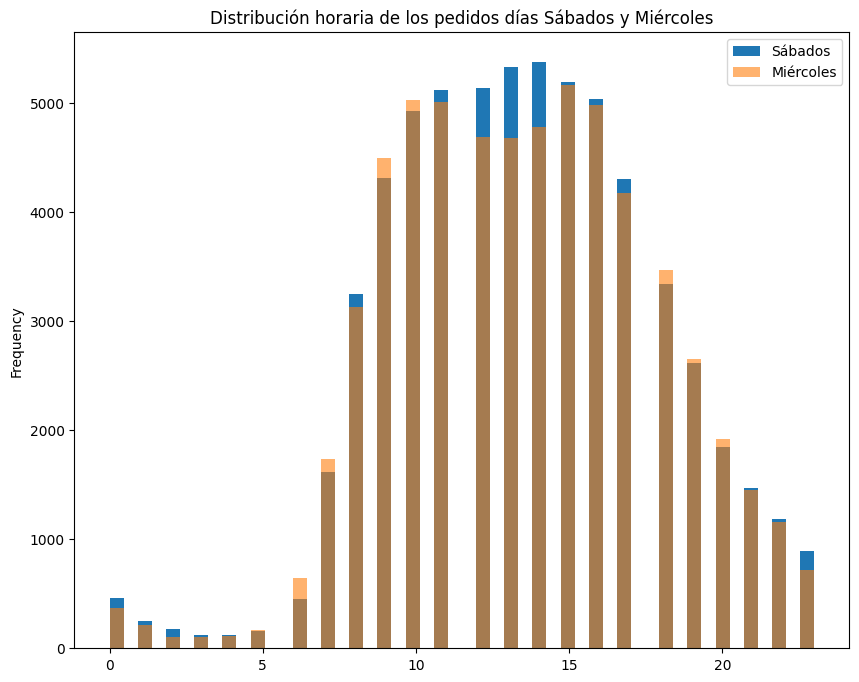

In [69]:
# Después de filtrados los pedidos par cada día, se generan histogramas para obtener la frecuencia
# de los horarios de los pedidos. Se genra un histograma para cada dataset y se grafican en la misma figura
# para poder compararlos

orders_sat['order_hour_of_day'].plot(
    kind='hist',
    bins=50,
    title='Distribución horaria de los pedidos días Sábados y Miércoles',
    xlabel='Hora del día',
    ylabel='Frequency',
    figsize=(10, 8)

)

orders_wed['order_hour_of_day'].plot(
    kind='hist',
    bins=50,
    alpha=0.6
)

plt.legend(['Sábados', 'Miércoles'])
plt.show()

1. Los dias sábados entre las 11:00 hrs y las 15:00 hrs se realizan más pedidos que los días miércoles. Y en las horas de la noche y la madrugada.
2. Los miércoles entre las 09:00 hrs y las 10:00 hrs, y entre las 18:00 hrs y las 20:00 hrs los usuarios son más activos que los días sábados.
3. En general el comportamiento de los clientes es similar sea Sábado o Miércoles, ya que las distribuciones son similares.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [70]:
# Se filtra el dataset para agurapar los usuarios por 'user_id' y se cuenta la cantidad de 'order_number'
# para cada usuario
users_distribution = instacart_orders.groupby('user_id')['order_number'].count()
print(users_distribution)

user_id
2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: order_number, Length: 157437, dtype: int64


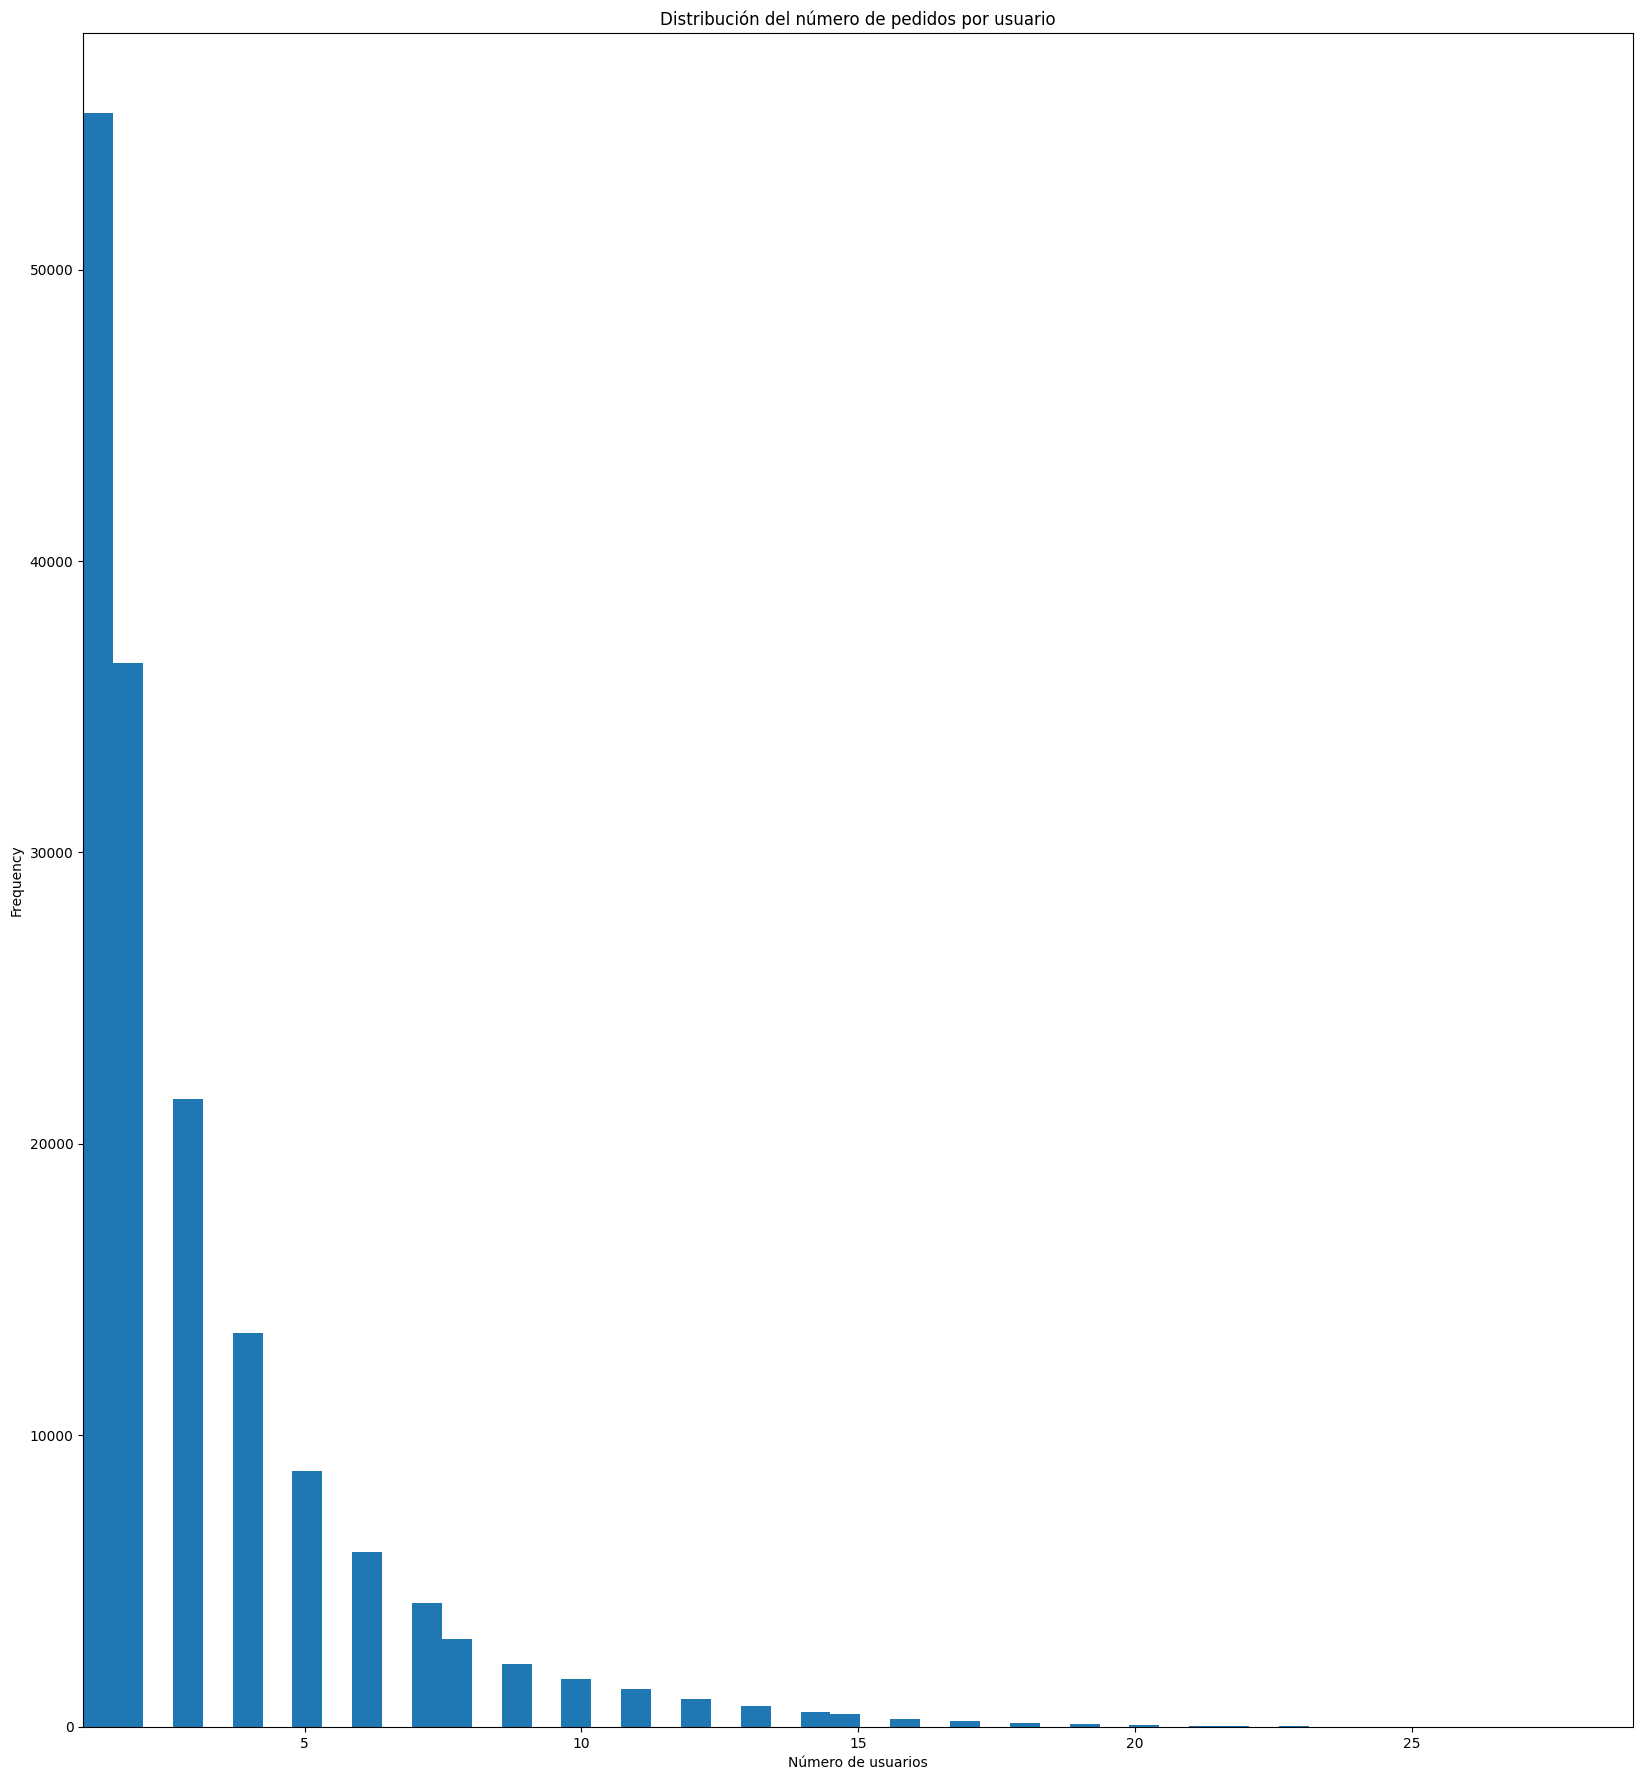

In [71]:
# Se grafica el dataset obtenido en el paso anterior, paa obtener la distribución del número de pedidos
# por cada usuario
users_distribution.plot(
    kind='hist',
    bins=50,
    title='Distribución del número de pedidos por usuario',
    xlabel='Número de usuarios',
    figsize=(20, 22),
    xlim=(1, 29)
    )
plt.show()

1. La mayoría de usuarios ha realiza entre 1 y 3 pedidos.
2. Pocos usuarios realizan mas de 10 pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [72]:
# Se filtra el dataset 'products' para obtener los datos de las columnas 'product_id' y 'product_name_upper'
products_name_id = products[['product_id', 'product_name_upper']]
print(f"-- Listado de productos y sus respectivos ID: \n{products_name_id.head(5)}")

-- Listado de productos y sus respectivos ID: 
   product_id                                 product_name_upper
0           1                         CHOCOLATE SANDWICH COOKIES
1           2                                   ALL-SEASONS SALT
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4           5                          GREEN CHILE ANYTIME SAUCE


In [73]:
# Se filtra el dataset 'orders_products' para obtener los datos de las columnas 'order_id' y 'product_id'
order_product_id = orders_products[['order_id', 'product_id']]
print(f"-- Lista de órdenes e identificador de productos: \n{order_product_id.head(5)}")

-- Lista de órdenes e identificador de productos: 
   order_id  product_id
0   2141543       11440
1    567889        1560
2   2261212       26683
3    491251        8670
4   2571142        1940


In [74]:
# Con los dos datasets obtenidos en los paso anteriores se hace un merge entre ellos utilizando
# como clave la columna 'product_id'. El nuevo dataset tiene los datos de 'product_id', 
# 'product_name_upper' y 'order_id'
order_product_id_name = products_name_id.merge(order_product_id, on='product_id')
print(f"-- Lista de órdenes y productos: \n{order_product_id_name.head(5)}")
print()
top_20_products = order_product_id_name.groupby(by=['product_name_upper','product_id'])['order_id'].count().sort_values(ascending=False)
print(f"-- Top 20 de los productos más pedidos: \n{top_20_products.head(20)}")


-- Lista de órdenes y productos: 
   product_id          product_name_upper  order_id
0           1  CHOCOLATE SANDWICH COOKIES   1104373
1           1  CHOCOLATE SANDWICH COOKIES   1774977
2           1  CHOCOLATE SANDWICH COOKIES    652770
3           1  CHOCOLATE SANDWICH COOKIES   1000035
4           1  CHOCOLATE SANDWICH COOKIES   1679949

-- Top 20 de los productos más pedidos: 
product_name_upper        product_id
BANANA                    24852         66050
BAG OF ORGANIC BANANAS    13176         53297
ORGANIC STRAWBERRIES      21137         37039
ORGANIC BABY SPINACH      21903         33971
ORGANIC HASS AVOCADO      47209         29773
ORGANIC AVOCADO           47766         24689
LARGE LEMON               47626         21495
STRAWBERRIES              16797         20018
LIMES                     26209         19690
ORGANIC WHOLE MILK        27845         19600
ORGANIC RASPBERRIES       27966         19197
ORGANIC YELLOW ONION      22935         15898
ORGANIC GARLIC         

1. Encontramos muchas frutas y vegetales entre los productos más pedidos.
2. También son de gran demanda los productos de origen orgánico.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [75]:
# Se filtran las columnas 'user_id' y order_id del dataset 'instacart_orders'
order_user_id = instacart_orders[['user_id', 'order_id']]
print(f"-- Listado de usuarios y órdenes: \n{order_user_id.head(5)}")

-- Listado de usuarios y órdenes: 
   user_id  order_id
0   183418   1515936
1   163593   1690866
2    39980   1454967
3    82516   1768857
4   196724   3007858


In [76]:
# Se filtran las columnas 'order_id' y 'product_id' del dataset 'orders_products'
order_product_id = orders_products[['order_id', 'product_id']]
print(f"-- Listado de órdenes e identificador de productos: \n{order_product_id.head(5)}")

-- Listado de órdenes e identificador de productos: 
   order_id  product_id
0   2141543       11440
1    567889        1560
2   2261212       26683
3    491251        8670
4   2571142        1940


-- Listado de usuarios, órdenes y productos: 
         user_id  order_id  product_id
0         183418   1515936       19048
1         183418   1515936       47766
2         183418   1515936       45066
3         183418   1515936       24082
4         183418   1515936       24363
...          ...       ...         ...
4545002     1730   2071924        1503
4545003     1730   2071924        4778
4545004     1730   2071924       11512
4545005     1730   2071924        4920
4545006     1730   2071924       17678

[4545007 rows x 3 columns]

-- Cantidad de productos por usuario: 
user_id
2     26
4      2
5     12
6      4
7     14
11    15
12    12
13    23
14    61
15    13
Name: product_id, dtype: int64


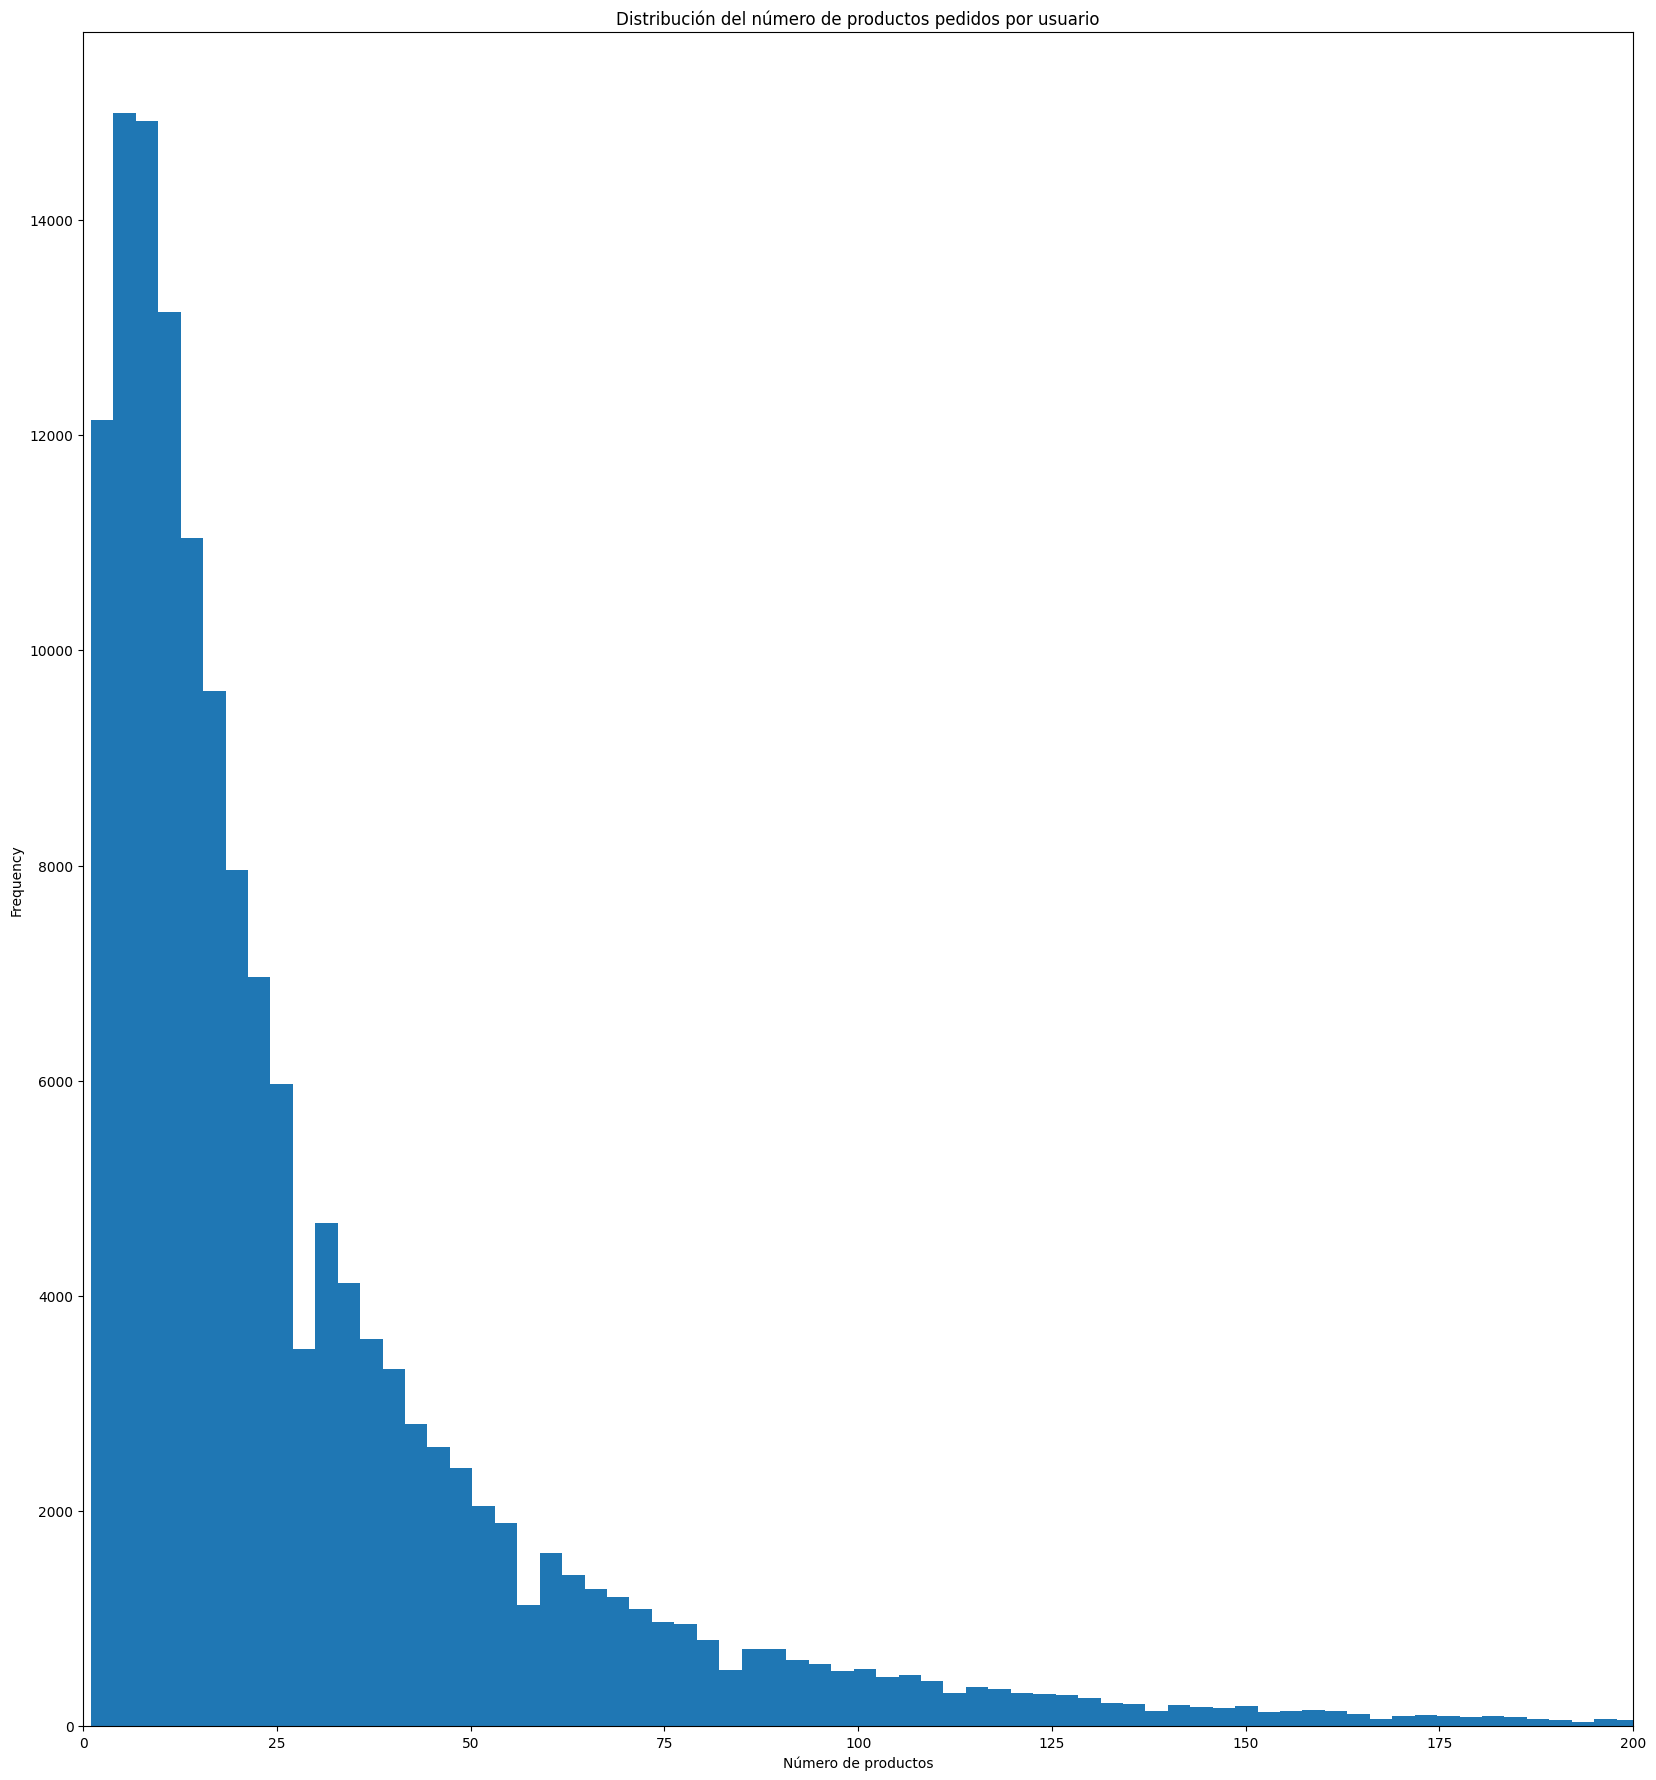

In [77]:
#### Se fusionan las dos tablas obtenidas en los pasos anteriores
merge_user_order_product = order_user_id.merge(order_product_id, on='order_id')
print(f"-- Listado de usuarios, órdenes y productos: \n{merge_user_order_product}")
print()
# Se agrupan los datos por usuarios y se realiza la cuenta de productos para obtner la cantidad
# productos comprada por cada usuario
group = merge_user_order_product.groupby('user_id')['product_id'].count()
print(f"-- Cantidad de productos por usuario: \n{group.head(10)}")

# Se realiza un histograma de las cantidades de los productos por usuario
group.plot(
    kind='hist',
    bins=200,
    title='Distribución del número de productos pedidos por usuario',
    xlabel='Número de productos',
    figsize=(20, 22),
    xlim=(0, 200)
    )
plt.show()

1. Este gráfico indica que la mayoría de usuarios compra menos de 25 productos.
2. La distribución de los datos indica que hay una dispersión entre las costumbres de consumo de los cientes.
3. Para efectos de una mejor visualización de la gráfica se ha establecido un límite de 200 productos en el eje x. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [78]:
# Se filtra la tabla 'orders_products' para obtener información sobre el ID de los productos y si han sido 
# repedidos o no.
ordered_products = orders_products[['order_id', 'product_id', 'reordered']]
print(f"-- Listado de productos: \n{ordered_products.head(5)}")
print()

# La tabla anterior se vuelve a filtrar para obtener el listado de órdenes y productos que se han pedido 
# antes por un cliente.
reordered_products = ordered_products[ordered_products['reordered'] == 1]
print(f"-- Listado de productos repedidos: \n{reordered_products.head(5)}")

-- Listado de productos: 
   order_id  product_id  reordered
0   2141543       11440          0
1    567889        1560          1
2   2261212       26683          1
3    491251        8670          1
4   2571142        1940          1

-- Listado de productos repedidos: 
   order_id  product_id  reordered
1    567889        1560          1
2   2261212       26683          1
3    491251        8670          1
4   2571142        1940          1
5   2456893       21616          1


In [79]:
# Se filtra la tabla 'products' para obtener información sobre el ID de los productos y su nombre en mayúscula
# para obtener así nombres únicos.
products_name = products[['product_id', 'product_name_upper']]
print(f"-- Listado de IDs de productos y sus nombres: \n{products_name.head(5)}")

-- Listado de IDs de productos y sus nombres: 
   product_id                                 product_name_upper
0           1                         CHOCOLATE SANDWICH COOKIES
1           2                                   ALL-SEASONS SALT
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4           5                          GREEN CHILE ANYTIME SAUCE


In [80]:
# Se fusionan las dos datasets obtenidos en los pasos anteriores, para crear una lista de los nombres de los
# productos, de sus IDs, y si han sido repedidos.
reordered_products_id_name = reordered_products.merge(products_name, on='product_id')
print(f"-- Listado de IDs y de nombres de productos repedidos: \n {reordered_products_id_name.head(5)}")

-- Listado de IDs y de nombres de productos repedidos: 
    order_id  product_id  reordered product_name_upper
0    567889        1560          1         BAG OF ICE
1    761899        1560          1         BAG OF ICE
2   1388514        1560          1         BAG OF ICE
3   2629631        1560          1         BAG OF ICE
4    866921        1560          1         BAG OF ICE


In [81]:
# Se agrupa la tabla fusionada por nombre de producto y ID de producto y se cuentan los pedidos para obtener
# el total de veces que fue pedido dicho producto. Luego se muestran las primeras 20 filas.
top_20_products_reordered = reordered_products_id_name.groupby(by=['product_name_upper','product_id'])['order_id'].count().sort_values(ascending=False)
print(f"-- Top 20 de los productos que más repiten los clientes: \n{top_20_products_reordered.head(20)}")

-- Top 20 de los productos que más repiten los clientes: 
product_name_upper        product_id
BANANA                    24852         55763
BAG OF ORGANIC BANANAS    13176         44450
ORGANIC STRAWBERRIES      21137         28639
ORGANIC BABY SPINACH      21903         26233
ORGANIC HASS AVOCADO      47209         23629
ORGANIC AVOCADO           47766         18743
ORGANIC WHOLE MILK        27845         16251
LARGE LEMON               47626         15044
ORGANIC RASPBERRIES       27966         14748
STRAWBERRIES              16797         13945
LIMES                     26209         13327
ORGANIC YELLOW ONION      22935         11145
ORGANIC GARLIC            24964         10411
ORGANIC ZUCCHINI          45007         10076
CUCUMBER KIRBY            49683          9538
ORGANIC FUJI APPLE        28204          8989
APPLE HONEYCRISP ORGANIC  8277           8836
ORGANIC BLUEBERRIES       39275          8799
ORGANIC LEMON             5876           8412
ORGANIC HALF & HALF       49235

1. Si comparamos este resultado con el obtenido al calcular el top 20 de los productos más vendidos *(ver punto 7.9[C2])* se observa que los mismos productos se mantienen.
2. Excpeto por los ORGANIC GRAPE TOMATOES, este producto sale del top 20 de los productos que más repiten los clientes, sería bueno investigar por qué los clientes no lo vuelven a pedir con la misma frecuencia.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [82]:
# Se filtra el dataset 'orders_products' para obtener los datos de las columnas 'order_id' y 'product_id'
# y la información de si el prodcuto fue repedido o no
reorder_products = orders_products[['order_id', 'product_id', 'reordered']]
print(f"-- Lista de órdenes e identificador de productos: \n{reorder_products.head()}")
print()
# Se fusionan las dos datasets 'reorder_products' y 'products_name' obtenidos en los pasos anteriores, para crear una lista de los nombres de los
# productos, de sus IDs, y si han sido repedidos o no.
list_product_names_order = reorder_products.merge(products_name)
print(f"-- Listado de IDs y de nombres de productos: \n {list_product_names_order.head()}")


-- Lista de órdenes e identificador de productos: 
   order_id  product_id  reordered
0   2141543       11440          0
1    567889        1560          1
2   2261212       26683          1
3    491251        8670          1
4   2571142        1940          1

-- Listado de IDs y de nombres de productos: 
    order_id  product_id  reordered              product_name_upper
0   2141543       11440          0  CHICKEN BREAST TENDERS BREADED
1    147172       11440          1  CHICKEN BREAST TENDERS BREADED
2   3341719       11440          1  CHICKEN BREAST TENDERS BREADED
3   1938779       11440          1  CHICKEN BREAST TENDERS BREADED
4   1728338       11440          0  CHICKEN BREAST TENDERS BREADED


In [83]:
# Con la ayuda de los métodos groupby() y aggregate() se obtiena la cuenta de pedidos totales por productos
# ('total_count_order')
# la cuenta de pedidos de productos ordenados por primera vez ('first_time_order')
# la cuenta de pedidos de productos que fueron reordenados ('reordered_products')

func_dict = {'order_id':'count'}
total_count_order = list_product_names_order.groupby(by=['product_name_upper','product_id']).aggregate(func_dict).sort_values(by='order_id', ascending=False)
print(f"-- Pedidos totales por producto: \n{total_count_order.head()}")
print()

q_string_first = "reordered == 0"
first_time_order = list_product_names_order.query(q_string_first).groupby(by=['product_name_upper','product_id']).aggregate(func_dict).sort_values(by='order_id', ascending=False)
print(f"-- Cantidad de productos ordenados por primera vez: \n{first_time_order.head()}")
print()

q_string_reordered = "reordered == 1"
reordered_products = list_product_names_order.query(q_string_reordered).groupby(by=['product_name_upper','product_id']).aggregate(func_dict).sort_values(by='order_id', ascending=False)
print(f"-- Cantidad de productos reordenados: \n{reordered_products.head()}")


-- Pedidos totales por producto: 
                                   order_id
product_name_upper     product_id          
BANANA                 24852          66050
BAG OF ORGANIC BANANAS 13176          53297
ORGANIC STRAWBERRIES   21137          37039
ORGANIC BABY SPINACH   21903          33971
ORGANIC HASS AVOCADO   47209          29773

-- Cantidad de productos ordenados por primera vez: 
                                   order_id
product_name_upper     product_id          
BANANA                 24852          10287
BAG OF ORGANIC BANANAS 13176           8847
ORGANIC STRAWBERRIES   21137           8400
ORGANIC BABY SPINACH   21903           7738
LARGE LEMON            47626           6451

-- Cantidad de productos reordenados: 
                                   order_id
product_name_upper     product_id          
BANANA                 24852          55763
BAG OF ORGANIC BANANAS 13176          44450
ORGANIC STRAWBERRIES   21137          28639
ORGANIC BABY SPINACH   21903        

In [84]:
# Los tres datasets obtenidos en el paso anterior se fusionan para obtener una tabla con los valores
# de las cantidades de pedidos por producto, y cuantas veces dicho producto fue pedido por primera vez
# y cuantas veces fue repedido.

df_merged = pd.merge(pd.merge(total_count_order,first_time_order,on=['product_name_upper', 'product_id'],suffixes=['_count_total', '_count_first']),reordered_products,on=['product_name_upper', 'product_id'])

# Se calcula la proporción de cuantas veces un pedido fue solicitado por primera vez
df_merged['proportion_first'] = df_merged['order_id_count_first'] / df_merged['order_id_count_total']

# Se calcula la proporción de cuantas veces un pedido fue reordenado
df_merged['proportion_reodered'] = df_merged['order_id'] / df_merged['order_id_count_total']

# Se imprimen los resultados

print(df_merged.loc[:,['proportion_first', 'proportion_reodered']])


                                                          proportion_first  \
product_name_upper                            product_id                     
BANANA                                        24852               0.155746   
BAG OF ORGANIC BANANAS                        13176               0.165994   
ORGANIC STRAWBERRIES                          21137               0.226788   
ORGANIC BABY SPINACH                          21903               0.227783   
ORGANIC HASS AVOCADO                          47209               0.206361   
...                                                                    ...   
VITAMIN E LOTION                              13556               0.500000   
SOFT WHITE 30/70/100 WATTS 3 WAY LIGHT BULBS  23770               0.500000   
VITAMIN CODE RAW PRENATAL VEGETARIAN CAPSULES 23877               0.500000   
HAPPY HIPS LAMB STRIPS                        44194               0.500000   
CLASSIC CRUST SAUSAGE PIZZA                   38401             

1. Los productos orgánicos tienen gran acogida entre los clientes. Muchos se vuelven a pedir en gran proporción.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [85]:
# Se utilizan variables ya creadas para obtner información de los ID de usuarios y del listado de productos 
# y si han sido repediso o no.
print(f"-- Listado de IDs de usuarios y IDs de órdenes: \n{order_user_id.head()}")
print()
print(f"-- Listado de productos: \n{list_product_names_order.head()}")
print()
func_agg = {'product_id':'count'}  # Función de agregación para contar los productos.

# Se fusionan los dos dataset para obtner un solo dataset con el 'user_id' y la información de cada producto
# pedido
user_order_id = order_user_id.merge(list_product_names_order, on='order_id')
print(f"-- Listado de usuarios y productos pedidos: \n{user_order_id.head()}")
print()

# Luego se calcula la cantidad de producto pedidos por usuario
total_products_users = user_order_id.groupby(by=['user_id']).aggregate(func_agg)
print(f"-- Cantidad de productos pedidos por usuario: \n{total_products_users.head()}")
print()

# Se filtra la cantidad de pedidos que han sido repedidos
user_reordered_id = user_order_id[user_order_id['reordered'] == 1]
print(f"-- Listado de usuario y productos repedidos: \n{user_reordered_id.head()}")
print()

# Se calcula la cantidad de productos repedido por cada usuario
reordered_products_user = user_reordered_id.groupby(by=['user_id']).aggregate(func_agg)
print(f"-- Cantidad de productos reordenados por cada usuario: \n{reordered_products_user.head(10)}")

-- Listado de IDs de usuarios y IDs de órdenes: 
   user_id  order_id
0   183418   1515936
1   163593   1690866
2    39980   1454967
3    82516   1768857
4   196724   3007858

-- Listado de productos: 
   order_id  product_id  reordered              product_name_upper
0   2141543       11440          0  CHICKEN BREAST TENDERS BREADED
1    147172       11440          1  CHICKEN BREAST TENDERS BREADED
2   3341719       11440          1  CHICKEN BREAST TENDERS BREADED
3   1938779       11440          1  CHICKEN BREAST TENDERS BREADED
4   1728338       11440          0  CHICKEN BREAST TENDERS BREADED

-- Listado de usuarios y productos pedidos: 
   user_id  order_id  product_id  reordered           product_name_upper
0   183418   1515936       21903          1         ORGANIC BABY SPINACH
1   183418   1515936       47766          1              ORGANIC AVOCADO
2   183418   1515936       24852          1                       BANANA
3   183418   1515936       22035          0  ORGANIC WHOLE

In [86]:
# Se fusionan las dos tablas con las cantidades de pedidos por usauario
proportion_user_products = total_products_users.merge(reordered_products_user, on='user_id', suffixes=['_total', '_reordered'])
print(f"-- Cantidad de productos pedidos totales y repedidos por usuario: \n{proportion_user_products.head(10).sort_values(by='product_id_reordered', ascending=False)}")
print()

# Se calcula la proporción de productos repedidos por cada usuario
proportion_user_products['proportion_reoders'] = proportion_user_products['product_id_reordered'] / proportion_user_products['product_id_total']
print(f"-- Proporción de productos repedidos por usuario: \n{proportion_user_products.head(10).sort_values(by='proportion_reoders', ascending=False)}")

-- Cantidad de productos pedidos totales y repedidos por usuario: 
         product_id_total  product_id_reordered
user_id                                        
17                     53                    38
14                     61                    22
16                     32                    17
7                      14                    13
13                     23                    13
5                      12                     8
15                     13                     7
11                     15                     3
12                     12                     3
2                      26                     1

-- Proporción de productos repedidos por usuario: 
         product_id_total  product_id_reordered  proportion_reoders
user_id                                                            
7                      14                    13            0.928571
17                     53                    38            0.716981
5                      12        

1. La cantidad de productos repedidos varía mucho de pendiendo del usuario.
2. Con esta información y la información obtenida de los productos más repedidos se puede establecer campañas para promocionar, primero los productos que menos repiten los usuarios y segundo a insentivar a que los usuarios vuelvan a pedir los productos.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [87]:
# Se extrae la información requerida de los datasets 'orders_products' y 'products'
list_of_products = products[['product_id', 'product_name_upper']]
print(f"-- Listado de nombre de productos y IDs: \n{list_of_products.head()}")
print()
list_of_orders = orders_products[['product_id', 'add_to_cart_order']]
print(f"-- Listado de órdenes: \n{list_of_orders.head()}")
print()

# Se fusionan los dos dataset para obtener un solo listado con el nombre de los productos, sus IDs
# y el orden en que fueron añadidos al carrito de compras
merged_list = list_of_orders.merge(list_of_products, on='product_id')
print(f"-- Listado de productos, y orden de añadido al carrito: \n{merged_list.head()}")

-- Listado de nombre de productos y IDs: 
   product_id                                 product_name_upper
0           1                         CHOCOLATE SANDWICH COOKIES
1           2                                   ALL-SEASONS SALT
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4           5                          GREEN CHILE ANYTIME SAUCE

-- Listado de órdenes: 
   product_id  add_to_cart_order
0       11440                 17
1        1560                  1
2       26683                  1
3        8670                 35
4        1940                  5

-- Listado de productos, y orden de añadido al carrito: 
   product_id  add_to_cart_order              product_name_upper
0       11440                 17  CHICKEN BREAST TENDERS BREADED
1       11440                  7  CHICKEN BREAST TENDERS BREADED
2       11440                  4  CHICKEN BREAST TENDERS BREADED
3       11440              

In [88]:
# Se filtra el dataset 'merged_list' para obtener solo aquellos productos que fueron añdidos primero
# al carrito
add_first_to_cart = merged_list[merged_list['add_to_cart_order'] == 1]
print(f"-- Listado de productos añadidos primeros al carrito: \n{add_first_to_cart.head()}")


-- Listado de productos añadidos primeros al carrito: 
    product_id  add_to_cart_order              product_name_upper
6        11440                  1  CHICKEN BREAST TENDERS BREADED
17       11440                  1  CHICKEN BREAST TENDERS BREADED
21       11440                  1  CHICKEN BREAST TENDERS BREADED
50       11440                  1  CHICKEN BREAST TENDERS BREADED
62       11440                  1  CHICKEN BREAST TENDERS BREADED


In [89]:
# Se realiza la cuenta del número de veces que un producto fue añadido al carrito
func_count = {'add_to_cart_order':'count'}
count_add_first = add_first_to_cart.groupby(by=['product_name_upper', 'product_id']).aggregate(func_count).sort_values(by='add_to_cart_order', ascending=False)

# Por cambia el nombre de la columna 'add_to_cart_order' para visualizar mejor los datos 
new_name_column = {
    'add_to_cart_order': 'count_add_first'}
count_add_first.rename(columns=new_name_column, inplace=True)

print(f"-- Top 20  de productos que más veces se añadieron primero al carrito: \n{count_add_first.head(20)}")

-- Top 20  de productos que más veces se añadieron primero al carrito: 
                                        count_add_first
product_name_upper          product_id                 
BANANA                      24852                 15562
BAG OF ORGANIC BANANAS      13176                 11026
ORGANIC WHOLE MILK          27845                  4363
ORGANIC STRAWBERRIES        21137                  3946
ORGANIC HASS AVOCADO        47209                  3390
ORGANIC BABY SPINACH        21903                  3336
ORGANIC AVOCADO             47766                  3044
SPRING WATER                19660                  2336
STRAWBERRIES                16797                  2308
ORGANIC RASPBERRIES         27966                  2024
SPARKLING WATER GRAPEFRUIT  44632                  1914
ORGANIC HALF & HALF         49235                  1797
LARGE LEMON                 47626                  1737
SODA                        196                    1733
ORGANIC REDUCED FAT MILK    3868

1. Los productos que fueron añadidos de primero al carrito coincide bastante con el listado de productos más pedidos.

### Conclusion general del proyecto:

- El proceso de preparación de los datos para el analísis es muy importante, y hacerlo bien implica tener mucha atención al detalle y conocer bien la información con la que se está trabajando.